<a href="https://colab.research.google.com/github/fKraus96/NLP_SEO_optimisation/blob/main/SEO_optimisation_Bunq_forum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SEO Optimisation using Bunq Together posts

**How to run:** 

The notebook is self-contained. You only need to specify the base directory where the data is stored in the line below and restart the Kernel one time after successful installation of the additional required packages. 


**Data Retrieval and Preprocessing:**

  - All posts from the 01/06/2020 at 6PM onwards are scraped and relevant information retrieved into a DataFrame. An explanation on the data columns is provided in the relevant Section. 
  - Several preprocessing steps including lemmatization and stopword removal are applied and further described under Preprocessing. 


**Analysis:**
 - Descriptive statistics will be checked out to get a better understanding of the dataset overall. 
 - Topic Modeling, TF-IDF vectors, BART and more will be utilised to support the SEO strategies outlined below. 

**SEO Strategies:**
 
 - **S1 -** Keyword optimisation across key topics based on user discussions in forum. 

 - **S2 -** Content generation and backlinking based on keywords identified in S1. 

 - **S3 -** Meta description generation for all FAQ and Knowledge pages based on summary of content. 


 
**Next Steps after this Analysis:**
- Deepdive into search term list provided to understand competitive position and attractiveness of each of the different terms - **S1**
- Generate relevant informatory content for keywords identified in S1 where missing, i.e in FAQ, Knowledge section - **S2**
- Crawl through Bunq website to find mentions of relevant Entities also found in the informatory content produced and provide linking back to the Knowledge pages - **S2**
- Further improve generated meta descriptions through enforcing most important keyword for the respective page to be included - **S3** 
- Create power point presentatio summarising the results to present to Marketing - **All**


In [ ]:
"""
Specify the directory of the folder this file is contained in
"""
base_dir = SPECIFY_DIRECTORY_LOCATION_HERE

In [ ]:
"""
Mount if using colab
"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Installations

**Kernel requires restart upon completion of this section**

In [ ]:
!pip install contextualized-topic-models==2.2.0

     |████████████████████████████████| 121 kB 11.8 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
     |████████████████████████████████| 785 kB 32.6 MB/s 
     |████████████████████████████████| 366 kB 52.0 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 374 kB 48.3 MB/s 
     |████████████████████████████████| 3.1 MB 44.5 MB/s 
     |████████████████████████████████| 3.3 MB 35.4 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 895 kB 46.3 MB/s 
     |████████████████████████████████| 596 kB 53.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=b1c4b8f7dbb22f2393de64047085f23cf3b9ef20d6e33be8955d693e273dc9fc
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built s

In [ ]:
!pip install bert-extractive-summarizer


In [ ]:
!pip install neuralcoref


     |████████████████████████████████| 286 kB 9.7 MB/s 
     |████████████████████████████████| 131 kB 49.7 MB/s 
     |████████████████████████████████| 8.1 MB 34.5 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 127 kB 61.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.16.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install pyldavis

     |████████████████████████████████| 1.7 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 50.6 MB/s 
     |████████████████████████████████| 11.3 MB 58.7 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b1b533935ede7c61113e6c8fe2eb72d71145048a34e660e5a569a2729d3d9d3a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
!pip install datasets


     |████████████████████████████████| 290 kB 8.0 MB/s 
     |████████████████████████████████| 243 kB 49.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
     |████████████████████████████████| 125 kB 61.9 MB/s 
     |████████████████████████████████| 192 kB 47.0 MB/s 
     |████████████████████████████████| 160 kB 50.4 MB/s 
     |████████████████████████████████| 271 kB 54.3 MB/s 


In [ ]:
!pip install --upgrade spacy

     |████████████████████████████████| 5.9 MB 7.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 38.2 MB/s 
     |████████████████████████████████| 451 kB 62.5 MB/s 
     |████████████████████████████████| 628 kB 44.2 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 8.3 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install --upgrade pandas==1.2

     |████████████████████████████████| 9.9 MB 8.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.16.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.0 which is incompatible.


##2. Standard Imports





In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np 
import pandas as pd

import sys, os

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
nlp = spacy.load("en_core_web_sm")

import nltk
import re

from ast import literal_eval

from collections import Counter


color_palette = sns.color_palette("magma",30)

In [ ]:
%mkdir '/usr/lib/nltk_data'
nltk.download('stopwords', download_dir='/usr/lib/nltk_data')
nltk.data.path.append('/usr/lib/nltk_data')

[nltk_data] Downloading package stopwords to /usr/lib/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Appends the Scripts file to ensure all self created classes can be imported 

sys.path.append(base_dir + "Scripts/")

## 3. Data Retrieval and Preprocessing

###3.1 Scrape Data

In [ ]:
from scraper import Scrape_Discussions, Scrape_Posts

In [ ]:
from datetime import datetime
to_date = datetime(2020,6,1,18)

In [ ]:
"""
The actual code for scraping can be found in the scraper.py file in this directory
The code is commented out as it takes some time to run - the final csv is provided in the Data folder
"""

"""
First we scrape all the titles through requesting the information from the API
"""
#scrape_discussion = Scrape_Discussions("https://together.bunq.com/api/discussions",to_date)
#scrape_discussion.get_discussion()


"""
Then we scrape the entire discussion, i.e. original post and comments for the complete information
"""
#post_scraper = Scrape_Posts("https://together.bunq.com/api/discussions", scrape_discussion.generate())
#post_scraper.get_posts()

'\nThen we scrape the entire discussion, i.e. original post and comments for the complete information\n'

In [ ]:
#all_data = post_scraper.posts_df()
#all_data.to_csv(base_dir + "Data/bunq_together.csv",index = False)

###3.2 Preprocessing




In [ ]:
"""
Lets load back in the dataset scraped in the subsection before
"""
all_data = pd.read_csv(base_dir + "Data/bunq_together.csv")

#Evaluate string representing list to type list
all_data["tags"] = all_data["tags"].apply(literal_eval)

all_data["corpus_preprocessed"] = all_data["corpus_preprocessed"].astype(str)
all_data.head()

,title,posted_at,created_At,contentType,user_id,username,tags,votes,is_pinned,is_locked,contentHtmlTranslated,text_nohtml,corpus_preprocessed
0,⚡️What’s new in App Update 18.8.0,2021-10-29 19:12:22+00:00,2021-10-29 19:12:22+00:00,start_thread,343358,bunq,"[Updates, What's New?]",6,True,True,<p>Hey bunqers! 🌈</p>\n\n<p>We’ve rolled out a...,Hey bunqers! 🌈\n\nWe’ve rolled out a new updat...,roll new update app include small new improvem...
1,Local Currencies Accounts Fees,2021-10-26 07:32:09+00:00,2021-10-26 07:32:09+00:00,start_thread,343358,bunq,"[Knowledge, What's New?]",1,True,True,"<p>Hey bunqers 🌈</p>\n\n<p>With <span class=""n...","Hey bunqers 🌈\n\nWith bunq, you save on conver...",save conversion spend get real exchange rate e...
2,Local Currencies 💸,2021-10-26 07:30:48+00:00,2021-10-26 07:30:48+00:00,start_thread,343358,bunq,"[Knowledge, What's New?]",0,True,True,"<p>Hey bunqers 🌈</p>\n\n<p>Receive, convert, h...","Hey bunqers 🌈\n\nReceive, convert, hold and sp...",receive convert hold spend favorite currency l...
3,Spanish IBANs Service Coverage 🇪🇸,2021-09-09 08:18:55+00:00,2021-09-09 08:18:55+00:00,start_thread,343358,bunq,"[Updates, Knowledge, Featured, What's New?, Sp...",124,True,True,<p>Hey bunqers! 🌈</p>\n\n<p>As you know with <...,Hey bunqers! 🌈\n\nAs you know with bunq Update...,know update announce exciting launch spanish i...
4,bunq Update 18 FAQ 📚,2021-08-31 16:50:59+00:00,2021-08-31 16:50:59+00:00,start_thread,343358,bunq,"[Updates, Knowledge, Features, What's New?]",0,True,True,"<h2><span class=""notranslate"">bunq</span> Upda...",bunq Update 18 FAQ 📚\n\nHey bunqers! 🌈 \n\nWit...,update faq exciting update come new faq check ...


In [ ]:
"""
Add the descriptions No Tag to the tags column where empty
"""
def no_tag(x):
    if len(x) == 0:
        x.append("No Tag")
    return x

all_data["tags"] = all_data["tags"].apply(no_tag)

In [ ]:
"""
Remove the HTML structure of the text as it is not interesting
"""

pattern = re.compile("<.*?>")
all_data["contentHtmlTranslated"] = all_data["contentHtmlTranslated"].astype(str)
all_data["text_nohtml"] = all_data["contentHtmlTranslated"].apply(lambda x: re.sub(pattern,"", x))

In [ ]:
"""
To get some inisght on the content of the data and to get an idea for some of the most standard keywords we need to do more processing. 
Some high scoring collocations of TFIDF vectors could give an interesting outlook on some potential keywords and their sentiment
"""

#Full code for preprocessing can be found in preprocessing.py
from preprocessing import Preprocessor
pos_list = ["ADJ","NOUN","VERB","PROPN"]

"""
Initiate class
"""
#preprocessor = Preprocessor(all_data,pos_list,nlp)

"""
Add bunq terms to the stopwords
"""
#preprocessor.add_stopwords(["bunq","bunqer"])

"""
Spacy is usef for preprocessing, in particular lemmatization is applied and many of the different part of speech tags removed
"""
#preprocessor.preprocess_text("text_nohtml")

"""
Lets also remove any Links
"""
#preprocessor.substitute("corpus_preprocessed", "\S*http\S*")

"""
other strings containing bunq
"""
#preprocessor.substitute("corpus_preprocessed", "\S*bunq\S*")


"""
and numbers
"""
#preprocessor.substitute("corpus_preprocessed","[^A-z\s]+")


'\nand numbers\n'

In [ ]:
"""
Lets safe the preprocessed data
"""

#all_data.to_csv(base_dir + "Data/bunq_together.csv",index = False)

'\nLets safe the preprocessed data\n'

##4. General Dataset Analysis

In [ ]:
"""
Reload the new preprocessed dataset
"""
#all_data = pd.read_csv(base_dir + "Data/bunq_together.csv")
#all_data["tags"] = all_data["tags"].apply(literal_eval)
all_data.head()

,title,posted_at,created_At,contentType,user_id,username,tags,votes,is_pinned,is_locked,contentHtmlTranslated,text_nohtml,corpus_preprocessed
0,⚡️What’s new in App Update 18.8.0,2021-10-29 19:12:22+00:00,2021-10-29 19:12:22+00:00,start_thread,343358,bunq,"[Updates, What's New?]",6,True,True,<p>Hey bunqers! 🌈</p>\n\n<p>We’ve rolled out a...,Hey bunqers! 🌈\n\nWe’ve rolled out a new updat...,roll new update app include small new improvem...
1,Local Currencies Accounts Fees,2021-10-26 07:32:09+00:00,2021-10-26 07:32:09+00:00,start_thread,343358,bunq,"[Knowledge, What's New?]",1,True,True,"<p>Hey bunqers 🌈</p>\n\n<p>With <span class=""n...","Hey bunqers 🌈\n\nWith bunq, you save on conver...",save conversion spend get real exchange rate e...
2,Local Currencies 💸,2021-10-26 07:30:48+00:00,2021-10-26 07:30:48+00:00,start_thread,343358,bunq,"[Knowledge, What's New?]",0,True,True,"<p>Hey bunqers 🌈</p>\n\n<p>Receive, convert, h...","Hey bunqers 🌈\n\nReceive, convert, hold and sp...",receive convert hold spend favorite currency l...
3,Spanish IBANs Service Coverage 🇪🇸,2021-09-09 08:18:55+00:00,2021-09-09 08:18:55+00:00,start_thread,343358,bunq,"[Updates, Knowledge, Featured, What's New?, Sp...",124,True,True,<p>Hey bunqers! 🌈</p>\n\n<p>As you know with <...,Hey bunqers! 🌈\n\nAs you know with bunq Update...,know update announce exciting launch spanish i...
4,bunq Update 18 FAQ 📚,2021-08-31 16:50:59+00:00,2021-08-31 16:50:59+00:00,start_thread,343358,bunq,"[Updates, Knowledge, Features, What's New?]",0,True,True,"<h2><span class=""notranslate"">bunq</span> Upda...",bunq Update 18 FAQ 📚\n\nHey bunqers! 🌈 \n\nWit...,update faq exciting update come new faq check ...


In [ ]:
"""
Check length of dataset
"""

print(f"Total posts: {len(all_data)}")
print("-"*30)
print(f"Untagged posts: {all_data['tags'].apply(lambda x: 'No Tag' in x).sum()}")


Total posts: 31041
------------------------------
Untagged posts: 10281


Text(0.5, 1.0, '15 most common tags')

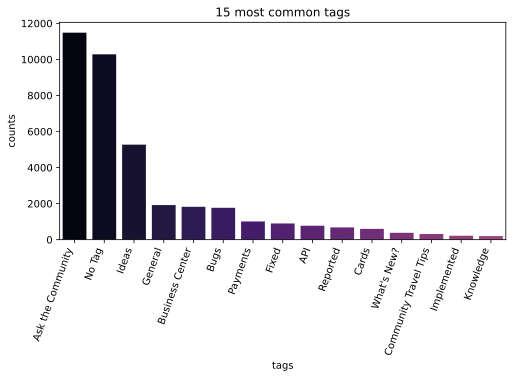

In [ ]:

"""
Lets plot the different tags that are associated to the different posts

"""

tags_counter = Counter([data for row in all_data["tags"] for data in row])

tags_df = pd.DataFrame(tags_counter.most_common(15),columns = ["tags","counts"])

fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(x = "tags", y = "counts", data = tags_df, ax = ax, palette= color_palette)

ax.set_xticklabels(tags_df["tags"], rotation=70, horizontalalignment= 'right')
ax.set_title("15 most common tags")

The user discussion focused tags such as Idea and Ask the Community are represented the most. These are also the ones targeted subsequently for SEO optimisation. 

In [ ]:
"""
Descriptive Statistics Plotting Function
"""

def preprocess_plots(data,column):
    plt.clf()
    fig,axs = plt.subplots(1,2,figsize = (13,6))
    
    fig.suptitle(f"Document length: {len(data)} posts")

    ax = axs[0]
    
    #the article length distribution reveals a very small number of outliers - closer analysis not show reveals these include podcast transcripts which will be dropped
    sns.histplot(data = data[column].str.split().str.len(),color = color_palette[10],binwidth = 5,ax = ax)
    ax.set_xlabel("Length of post")
    ax.set_title("Review Length distribution")
    
    
    ax = axs[1]
    counts = Counter([token for document in data[column] for token in document.split()])
    common_words = [word for word,count in counts.most_common(20)]
    sns.barplot(x = np.arange(20),y = sorted(list(counts.values()),reverse = True)[:20],ci = None,ax = ax,palette=color_palette)
    ax.set_xticklabels(common_words,rotation=70, horizontalalignment= 'right')
    ax.set_xlabel("Words")
    ax.set_title(f"Distribution of the top {len(counts)} Words in the dataset")

    fig.tight_layout(rect = [0,0.03,1,0.95])
    
    return counts



<Figure size 432x288 with 0 Axes>

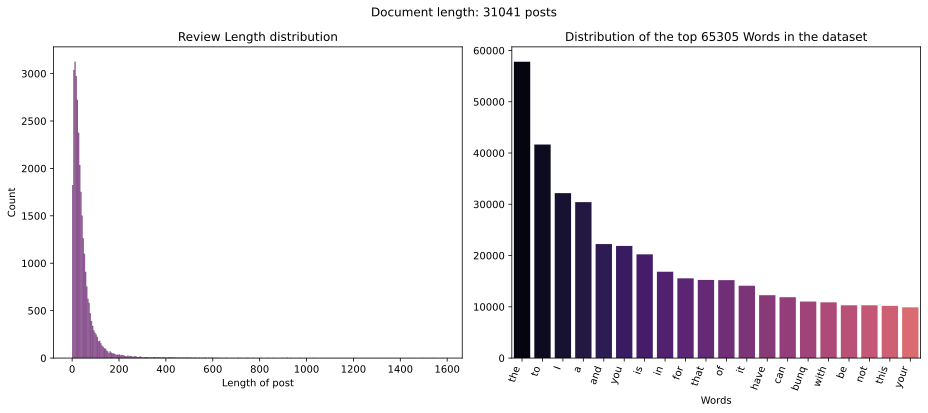

In [ ]:
"""
Lets check some basic statistics of the docs
"""

word_counts = preprocess_plots(all_data,"text_nohtml")

As expected, a lof of redundant words dominate the text before preprocessing. THese will have all been removed in the preprocessing steps as shown below.

<Figure size 432x288 with 0 Axes>

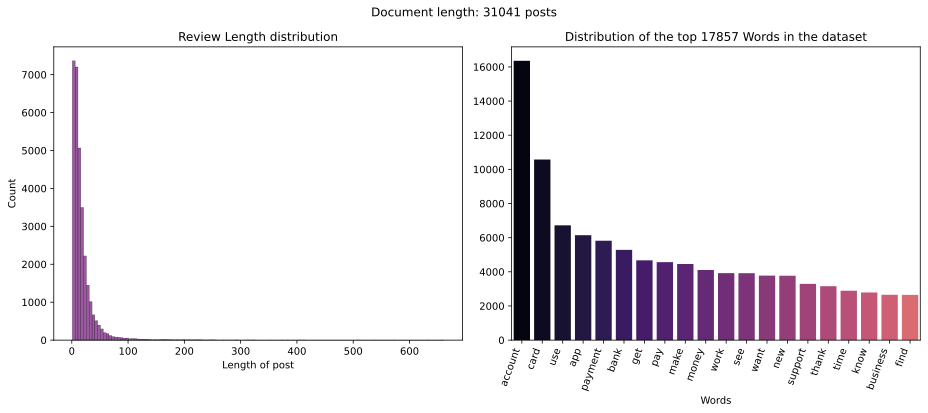

In [ ]:
"""
lets plot descriptives after preprocessing
"""
counts_prep = preprocess_plots(all_data,"corpus_preprocessed")

As expected, the most frequent words now center around banking.


##5. SEO Strategies

This strategy will outline 3 strategies based on the data that are designed to improve the SEO score.



###5.1 Keyword Generation by Topic

The SEO score is typically improved through optimising the keyword and link structure across the website. We can use the user Feedback to understand what are some of the important topics that people associate with Bunq and for each topic, find a set of keywords that are most relevant. Such keywords can subsequently be used for optimisation. 

Similarly, it is vital for Googles understanding to provide informatory content on the most frequent questions of users on the website. Hence, such content, where missing, should be generated based on identified topics and their keywords. Furthermore, links to such content should be established across the webpage, where related topics are mentioned. 

For this SEO strategy, only the subset of Ask the Community and No Tag tags is considered. Since we want take the users issues and questions as the bases for new keyword suggestions and content, we should focus on analysing the content that is written by the user. We also likely can remove all responses from bunq.

In [ ]:
"""
Remove bunq tags
"""

data_no_bunq = all_data.loc[(all_data["username"] != "bunq") & (~all_data["corpus_preprocessed"].isna())]
data_no_bunq.head()

,title,posted_at,created_At,contentType,user_id,username,tags,votes,is_pinned,is_locked,contentHtmlTranslated,text_nohtml,corpus_preprocessed
10,True Name: Feedback 💬,2021-06-02 05:35:44+00:00,2021-05-26 15:38:15+00:00,comment,6554,Tuur,"[Ask the Community, Cards, Community]",1,True,True,<p>Can you post a picture on how a true name w...,Can you post a picture on how a true name woul...,post picture true name look card order card tr...
11,True Name: Feedback 💬,2021-06-02 06:08:02+00:00,2021-05-26 15:38:15+00:00,comment,222677,Jakob-Y,"[Ask the Community, Cards, Community]",1,True,True,"<p><a href=""/d/44107/5"" class=""PostMention"" da...",Arthur Looks like this:\n\n\n\nIn the first li...,arthur look first line card holder official na...
12,True Name: Feedback 💬,2021-06-02 06:46:22+00:00,2021-05-26 15:38:15+00:00,comment,6554,Tuur,"[Ask the Community, Cards, Community]",1,True,True,<p>Thanks for the picture.</p>\n\n<p>Only pity...,Thanks for the picture.\n\nOnly pity is they u...,thank picture pity use mastercard debit exampl...
18,Together Community Guidelines 📣,2019-07-18 10:25:05+00:00,2019-07-18 10:25:05+00:00,start_thread,177265,Raul-Cyan-Lion-3476404034,"[Knowledge, What's New?]",38,True,True,"<p><img src=""https://bunq-prod-together-files....","\n\nWelcome to Together,\n\nAt bunq we love to...",welcome love listen user year come great commu...
19,What is my Tax Identification Number (TIN)?,2019-07-05 16:43:52+00:00,2019-07-05 16:43:52+00:00,start_thread,177267,Matteo-Indigo-Akita-2429416581,"[Knowledge, Frequently Asked Questions, Signup]",33,True,True,<p>Most banks make you provide this right away...,"Most banks make you provide this right away, b...",bank make provide give day send tax identifica...


In [ ]:
"""
Lets get the dataframe with just the right tags
"""

community_df = data_no_bunq.loc[data_no_bunq["tags"].apply(lambda x: "No Tag" in x or "Ask the Community" in x)].copy()


<Figure size 432x288 with 0 Axes>

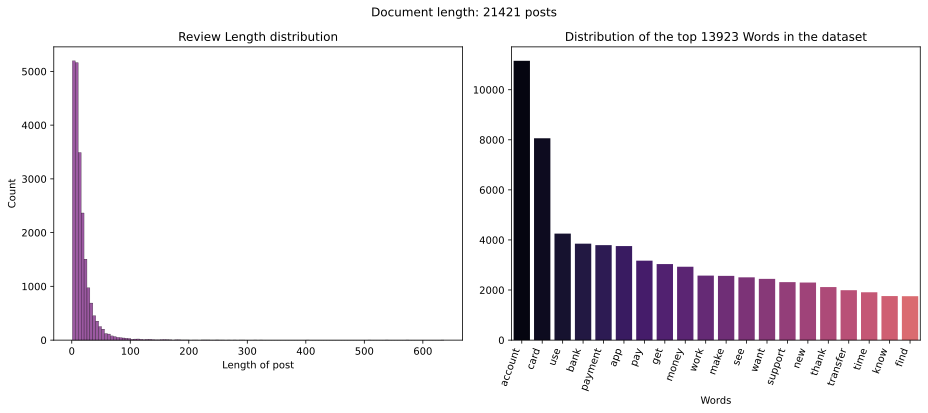

In [ ]:
"""
Descriptives of the community_df
"""
counts_comm = preprocess_plots(community_df, "corpus_preprocessed")

The most common word and post length distribution is almost equivalent to that of the complete dataset.


#### 5.1.1 TFIDF Scores



TFIDF scores provide an good measure for understanding word importance, which could already pre-highlight some of the general directions the keyword search could go towards. Hence, lets get the scores for all Bigrams and visualise them. 

Sklearn provides a very easy and intuitive implementation for this, which is utilised here. 

In [ ]:
"""
Tfidf Vectorization Word based
"""
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,3), 
                             min_df=0.001, 
                             max_df=0.4, 
                             analyzer='word',
                             sublinear_tf=True
                            )



tfidf = vectorizer.fit_transform(community_df["corpus_preprocessed"])


In [ ]:
"""
get dataframe of word counts and tfidf scores
and count vectors
"""
counts_vectorizer = CountVectorizer(ngram_range = (2,3),max_df = 0.4,min_df = 0.001)

counts = counts_vectorizer.fit_transform(community_df["corpus_preprocessed"])


tf_summed= pd.DataFrame({"word" : vectorizer.get_feature_names(),"counts" : counts.toarray().sum(axis = 0),"idf" : vectorizer.idf_,
                         "tfidf" : tfidf.toarray().sum(axis = 0)})



<Figure size 432x288 with 0 Axes>

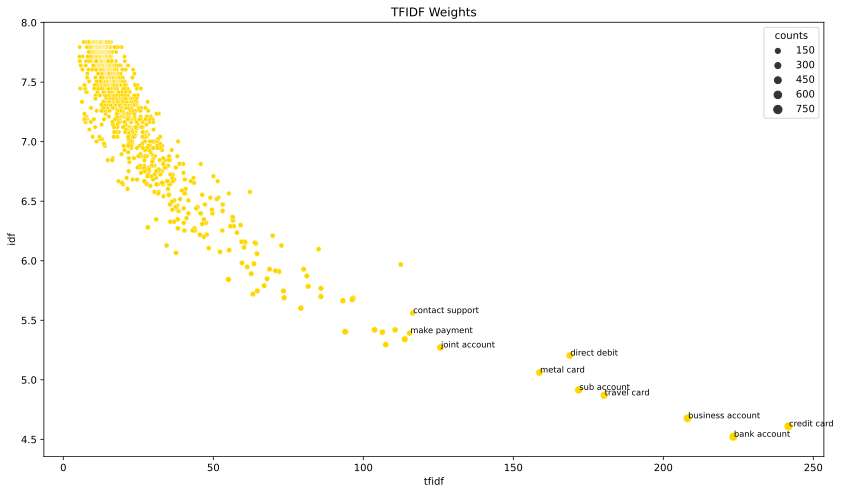

In [ ]:
"""
Plot the tfidf scores and top 10 words
"""

def plot_tfidf(data,n_annotates = 10):
    plt.clf()
    data = data.sort_values(by = "tfidf",ascending = False)[:max(len(tf_summed),3000)]

    fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (14,8))
    sns.scatterplot(x = "tfidf", y = "idf", size = "counts", data = data,alpha = 1,ax = ax,color = "gold")
    ax.set_title("TFIDF Weights")

    for index,row in data.iloc[0:n_annotates].iterrows():
        ax.text(row["tfidf"]+0.2,row["idf"] ,row["word"],horizontalalignment='left',size = "small")


plot_tfidf(tf_summed)

The keywords outlined here already provide some insights on what people are asking on the forum and are hence also likely to be googling. In particular, a quick try at searching some of these collocations reveals targeting by online banks such as Revolut and N26. 

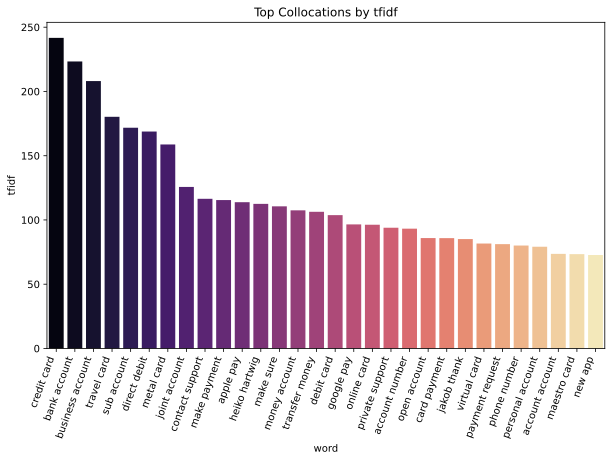

In [ ]:
"""
Barplot for best tfidf scores
"""

top_tfidf = tf_summed.sort_values(by = "tfidf",ascending = False).iloc[:30]

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = "word",y = "tfidf", data = top_tfidf,ax = ax, palette=color_palette)
ax.set_xticklabels(top_tfidf["word"], horizontalalignment = "right", rotation = 70)
ax.set_title("Top Collocations by tfidf")
plt.show()

As is understood, the general topics of converstaion amon bunqs clients are surrounding the different kind of accounts and bank cards that are possible. It is likely that new customers are attracted through searches of similar matter as they look for reliable and good offering in terms of different accounts. Hence it is vital to score highly for these in terms of organic search in all the different countries - both in English and in local language. 

####5.1.2 Topic Modeling 

Lets get a deeper understanding of the different topics people talk about and outline some main keywords based on that. We can further uses these topics to understand any important entitities for which informatory content can be generated and linked to on the Bunq website. 

This analysis will use a contextualized topic modeling that utilises a combination of BERT embeddings and BoW as inputs. 

In [ ]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessing

from contextualized_topic_models.evaluation.measures import CoherenceCV,CoherenceUMASS,InvertedRBO

In [ ]:
"""
We will run again the counts vectoriser just to get a vocab size with the desired document frquencies
"""

vectorizer_lda = TfidfVectorizer(ngram_range=(1,1), 
                             min_df=0.001, 
                             max_df=0.4, 
                             analyzer='word',
                             sublinear_tf=True
                            )

vec_lda = vectorizer_lda.fit_transform(community_df["corpus_preprocessed"])
vocab = vectorizer_lda.get_feature_names()

In [ ]:
"""
We will need some more additional preprocessing in order to get the data into the necessary format
"""
def get_most_common(document):
  return " ".join([token for token in document.split(" ") if token in vocab])
 

preprocessed_documents = list(community_df["corpus_preprocessed"].apply(get_most_common))
unpreprocessed_corpus = list(community_df["text_nohtml"])

In [ ]:
tp = TopicModelDataPreparation("paraphrase-distilroberta-base-v1")

training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/108 [00:00<?, ?it/s]

##### Tune Model

Due to the random nature of LDA, the results here in terms of the topic number will be slightly different each time. Hence, it is advised to utilise the pretrained model provided and loaded later in this section. 


In [ ]:
"""
lets aim to find the optimal n topics through an evaluation of Umass and CV scores
"""

coherence_values=[]

for i in np.arange(8,20,1):
  ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=int(i), num_epochs=20)
  ctm.fit(training_dataset) # run the model

  cv = CoherenceCV(topics=ctm.get_topic_lists(10), texts=[line.split(" ") for line in preprocessed_documents])
  umass = CoherenceUMASS(topics=ctm.get_topic_lists(10), texts=[line.split(" ") for line in preprocessed_documents])
  

  coherence_values.append((i, umass.score(), cv.score()))

Epoch: [20/20]	 Seen Samples: [419000/419000]	Train Loss: 103.73023908301015	Time: 0:00:03.024323: : 20it [01:00,  3.02s/it]
Epoch: [20/20]	 Seen Samples: [419000/419000]	Train Loss: 103.79723430041766	Time: 0:00:03.024750: : 20it [01:00,  3.01s/it]
Epoch: [5/100]	 Seen Samples: [104750/2095000]	Train Loss: 105.27333675557503	Time: 0:00:03.011864: : 5it [08:24, 100.86s/it]
Epoch: [20/20]	 Seen Samples: [419000/419000]	Train Loss: 104.00749935905803	Time: 0:00:03.029633: : 20it [01:01,  3.06s/it]
Epoch: [20/20]	 Seen Samples: [419000/419000]	Train Loss: 104.02006678032704	Time: 0:00:02.976216: : 20it [01:00,  3.03s/it]
Epoch: [20/20]	 Seen Samples: [419000/419000]	Train Loss: 104.21108644326148	Time: 0:00:03.010515: : 20it [01:00,  3.02s/it]
Epoch: [20/20]	 Seen Samples: [419000/419000]	Train Loss: 104.4879709408562	Time: 0:00:02.977655: : 20it [01:00,  3.03s/it]
Epoch: [20/20]	 Seen Samples: [419000/419000]	Train Loss: 104.67515690259546	Time: 0:00:03.018798: : 20it [01:00,  3.01s/it]


In [ ]:
scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
scores.head()

,num_topics,UMass,CV
0,8,-5.835080,0.615592
1,9,-5.659972,0.605103
2,10,-5.644489,0.631687
3,11,-4.591202,0.599611
4,12,-4.970738,0.612590


Text(0.5, 1.0, 'Coherence Scores')

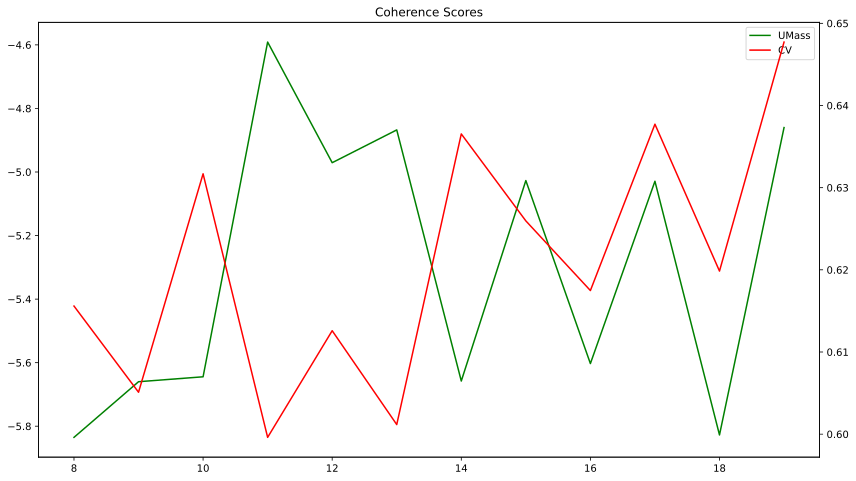

In [ ]:
"""
Plot of UMass and CV scores
"""

fig, ax = plt.subplots(figsize=(14, 8))
lns1 = ax.plot(scores['num_topics'],scores['UMass'], color = "g", label = "UMass");

ax1 = ax.twinx()
lns2 = ax1.plot(scores['num_topics'], scores['CV'], color = "r", label = "CV");

#Creates legend for both axes in one
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title("Coherence Scores")

##### Train Model

Does not need to be run. 

In [ ]:
#Outlined as the optimal trade-off between max CV score and min UMass
#n_topics = 14

In [ ]:
#Train the model with optimal n_topics

#ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=n_topics, num_epochs=100)
#ctm.fit(training_dataset) # run the model

Epoch: [100/100]	 Seen Samples: [2105300/2105300]	Train Loss: 103.37040941871408	Time: 0:00:04.492506: : 100it [07:25,  4.45s/it]


In [ ]:
#ctm.save(models_dir=base_dir + "CTMs")

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/models/ctm.py:472: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  Warning)


#####Results

In [ ]:
"""
Load in the trained model
"""

#Outlined as the optimal trade-off between max CV score and min UMass
n_topics = 14

ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, num_epochs=50, n_components=n_topics)
ctm.load(base_dir + "CTMs/contextualized_topic_model_nc_14_tpm_0.0_tpv_0.9285714285714286_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",epoch=99)

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/models/ctm.py:497: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  Warning)


In [ ]:
"""
Get top 7 words for each topic
"""

ctm.get_topic_lists(6)


[['jakob', 'thank', 'quick', 'tim', 'info', 'reply'],
 ['money', 'bank', 'use', 'account', 'pay', 'get'],
 ['common', 'applicable', 'usage', 'respective', 'symbol', 'girlfriend'],
 ['payment', 'transfer', 'day', 'time', 'take', 'instant'],
 ['bank', 'iban', 'tax', 'german', 'french', 'dutch'],
 ['topic', 'feedback', 'think', 'version', 'tree', 'design'],
 ['applicable', 'symbol', 'agency', 'random', 'respective', 'cardquot'],
 ['limit', 'direct', 'withdraw', 'atm', 'amount', 'maximum'],
 ['gt', 'profile', 'click', 'top', 'support', 'bottom'],
 ['account', 'business', 'connect', 'joint', 'owner', 'premium'],
 ['pay', 'card', 'mastercard', 'credit', 'accept', 'work'],
 ['account', 'app', 'payment', 'see', 'make', 'get'],
 ['card', 'order', 'replacement', 'freeze', 'travel', 'virtual'],
 ['app', 'api', 'device', 'code', 'phone', 'try']]

In [ ]:
#Get topic per document in the corpus
most_probable_topic = np.argmax(ctm.get_thetas(training_dataset, n_samples=5),axis = 1) # get all the topic predictions


Sampling: [5/5]: : 5it [00:18,  3.71s/it]


In [ ]:
"""
Lets define the list of topics deemed relevant for the analysis
"""
topic_list = [3,4,7,9,10,12]
topic_dict = {3: "Transfers", 4: "Local Ibans", 7: "Withdrawals", 9: "Accounts", 10: "Cards", 12: "Plans"}


community_df["Topic"] = [topic_dict.get(i,"Other") for i in most_probable_topic]

We can indeed identify some interesting topics that can be used for further keyword targeting.  

Relevant topics include: 

1. Transfers - 3
2. Local Ibans - 4
3. Withdrawals - 7
4. Accounts - 9
5. Card - 12
6. Plans - 13


Lets make some further plots to see the data in a more visual way. 

In [ ]:


import matplotlib.ticker as mticker

def plot_importance_plot(data,col,n_words = 10):
    plt.clf()
    sns.set_style("white")
    
    #Function to get dataframe utilised in plotting
    def return_topic_importance(data, col,n_words):
        output = []
        for i, topic in enumerate(ctm.get_topic_lists(n_words)):
          #Counter of words in topic
          topic_count = Counter([token for document in data.loc[most_probable_topic == i,col] for token in document.split()])
          #Add list of tuples for each of the most important words with relevant information, i.e. counts and weight
          output += [(word, i, topic_count[word]/sum(topic_count.values()), topic_count[word]) for word in topic]

        return pd.DataFrame(output,columns = ["word","topic","weight","word_count"])


    
    topic_importance = return_topic_importance(data,col,n_words)
    
    #plot the above topic importance dataframe per topic category
    cols = color_palette[4::4]
    fig, axes = plt.subplots(3,2,figsize=(14,14), sharey=True)
    for i, ax in enumerate(axes.flatten()):
        topic = topic_list[i]

        #Two bar plots representing word weight in topic and word frequency in topic
        ax.bar(x='word',height='word_count', data=topic_importance[topic_importance['topic']==topic],color=cols[i],
           label='Word Count', width=0.5, alpha=0.3)
        
        ax_twin = ax.twinx()
        ax_twin.bar(x='word',height='weight', data=topic_importance[topic_importance['topic']==topic],color=cols[i],
           label='Topic importance', width=0.2 )
        
        ax.set_xticklabels(topic_importance[topic_importance['topic']==topic]['word'],rotation=70, horizontalalignment= 'right')
        ax.set_title(topic_dict[topic], color=cols[i])

        ax.legend(loc='upper left'); 
        ax_twin.legend(loc='upper right')

        
    fig.tight_layout(rect = [0,0.03,1,0.95]) 
    fig.suptitle('Barplot of word count and importance per each topic category')
    plt.show()
    return topic_importance

<Figure size 432x288 with 0 Axes>

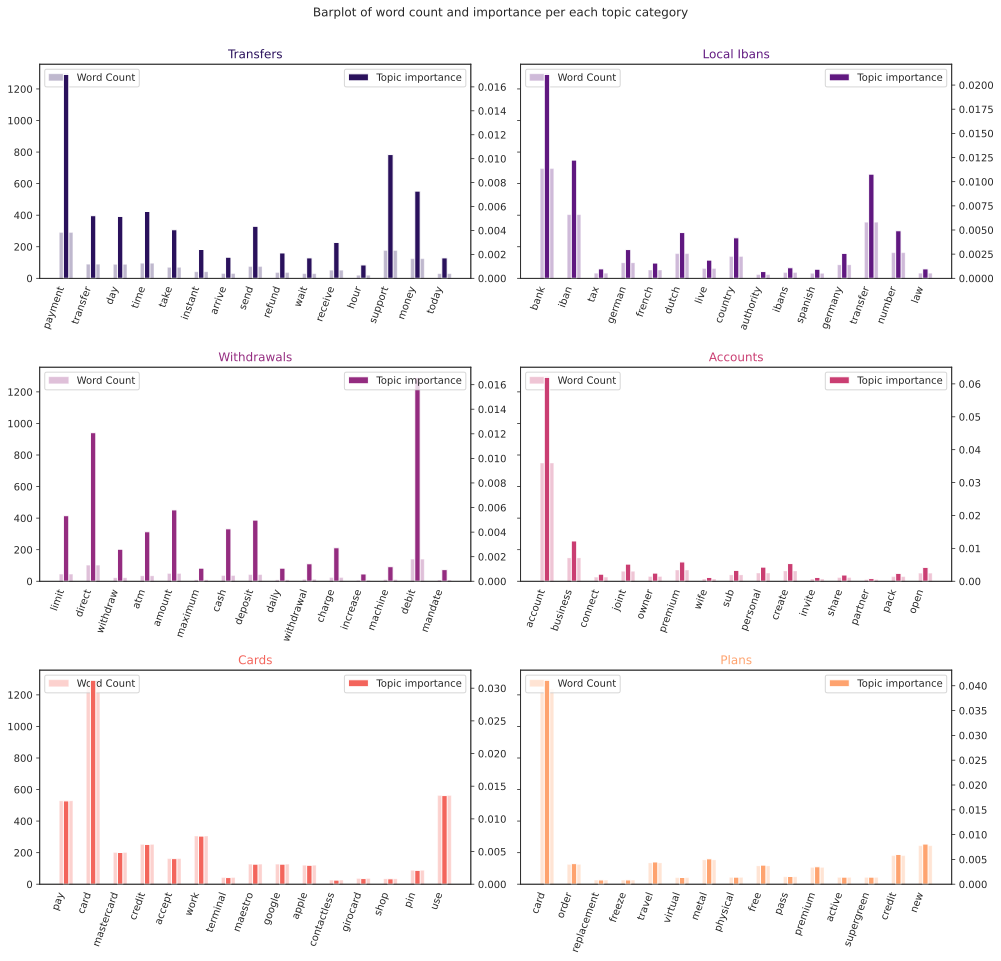

In [ ]:
topic_importance = plot_importance_plot(community_df,"corpus_preprocessed",15)


While each of these topics provide an interesting ground for keywords optimisation, it is likely that the user will search for some combinations of the top words outlined in the above topics: 

e.g. Metal Card, Supergreen Subscription etc. 

Hence, we will create the most frequent collocations from our corpus and see which of these collocations can be found in the top_n words within each of our topics. Finally, the google search position of these collocations will be outlined to understand which keywords require special focus across different countries. 

####4.1.3 Keyword Extraction

In [ ]:
"""
Find collocations based on PMI in the tweets and create a dictionary to insert them in the dataframe

We will look for Bigram, Trigram and Quadgram collocations using NLTK
"""

from nltk import ngrams
from nltk.collocations import BigramCollocationFinder,TrigramCollocationFinder,QuadgramCollocationFinder
from nltk.metrics.association import QuadgramAssocMeasures

def find_collocations(corpus,n = 3):
    words = [word for document in corpus for word in document.split()
            if len(word) > 2 and len(word) <20]

    #bigrams
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder_bi = BigramCollocationFinder.from_words(words, window_size = 2)
    finder_bi.apply_freq_filter(25)
    collocs = finder_bi.score_ngrams(bigram_measures.pmi)[:500]

    #trigrams
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    finder_tri = TrigramCollocationFinder.from_words(words, window_size = 3)
    finder_tri.apply_freq_filter(15)
    collocs += finder_tri.score_ngrams(trigram_measures.pmi)[:500]

    #quadgrams 
    quadgram_measures = QuadgramAssocMeasures()
    finder_quad = QuadgramCollocationFinder.from_words(words, window_size = 4)
    finder_quad.apply_freq_filter(15)
    collocs += finder_quad.score_ngrams(quadgram_measures.pmi)[:300]

    return collocs

#Find the collocations
collocs = find_collocations(community_df['corpus_preprocessed'])


In [ ]:
"""
Collect all the keyword suggestions in a dataframe
"""

from collections import defaultdict
keywords_by_topic = []

#Check for all the collocations whether they are found in any of the topics and assign them to a topic accordingly
for colloc in collocs:
  #Go through each topic
  for i,topic in enumerate(ctm.get_topic_lists(30)):
    #Check that all the words that form the collocation are found in the topic
    if all([word in topic for word in colloc[0]]):
      #Check that the topic is actually also relevant for the analysis
      if i in topic_list:
        keywords_by_topic.append((topic_dict[i]," ".join(colloc[0]),colloc[1]))

keywords_df = pd.DataFrame(keywords_by_topic,columns = ["Topic", "Keywords","Score"]).sort_values(by = ["Topic", "Score"],ascending = False)


In [ ]:
"""
The keywords contain a lot of duplications of the words contained - e.g. credit card credit
Since we do not want repitions of the same word within one search term, all duplicate words are removed from each suggestion. 
Finally duplicate rows are also removed 
"""

#Function that removes duplicates from the actual collocations
def uniques(x):
  return " ".join(dict.fromkeys(x.split()))

keywords_df["Keywords"] = keywords_df["Keywords"].apply(uniques)

#After removing duplicates in each line, duplicate rows remain and need to be dropped
keywords_df = keywords_df.drop_duplicates(["Topic", "Keywords"], ignore_index = True)

<Figure size 432x288 with 0 Axes>

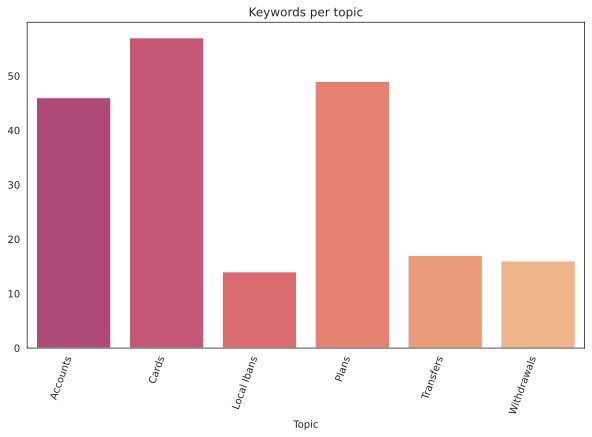

In [ ]:
"""
Plots the number of keywords per topic
"""

def topic_dist(data, col_name = "Topic"):
  plt.clf()
  counts_per_topic = data.groupby(col_name).size()

  fig, ax = plt.subplots(figsize = (10,6))
  sns.barplot(x = counts_per_topic.index,y = counts_per_topic.values,ax = ax, palette = color_palette[15::2])
  ax.set_xticklabels(counts_per_topic.index,rotation = 70, horizontalalignment = "right")
  ax.set_title("Keywords per topic")
  plt.show()

topic_dist(keywords_df)

Each of the section contain a number of interesting keywords. In particular a quick lock on a number of the words provided shows targetting by competitors such as N26 in particular through the provision of informatory content. 

Examples include: 

1. Metal Cards
2. Travel Cards
3. Sepa Transfer
4. Instant Transfer
5. Joint Account
6. Open Business Account
7. New sub account
8. Supergreen subscription
9. SEPA instant



In [ ]:
"""
Save the keywords in a CSV file for later review
"""

#keywords_df.to_csv(base_dir + "Data/Results/keywords.csv",index = False)

'\nSave the keywords in a CSV file for later review\n'

At this stage, a quick analysis using Moz was carried out to figure out the Monthly volume, Keyword Difficulty, CPC and Competitive Density, in order to get an overview on the usefulness of these terms. Some results can be found below. 


In [ ]:
"""
Load in keywords with their search volume and competitive rank
"""

keywords_analysed = pd.read_csv(base_dir + "Data/Results/keywords_analysed.csv")
keywords_analysed = keywords_analysed.loc[~keywords_analysed["Keyword Difficulty"].isna()]
keywords_analysed.head()

,Topic,Keywords,Score,Monthly volume,Keyword Difficulty,CPC (USD),Competitive Density
0,Plans,metal card,5.253164,3600.0,63.0,1.30,1.00
1,Plans,green plan,5.096661,720.0,70.0,0.78,1.00
2,Accounts,open business account,8.621508,1600.0,82.0,17.60,0.92
3,Accounts,business account,6.277691,12100.0,91.0,15.41,0.83
4,Plans,order metal,4.412316,30.0,60.0,1.30,0.82


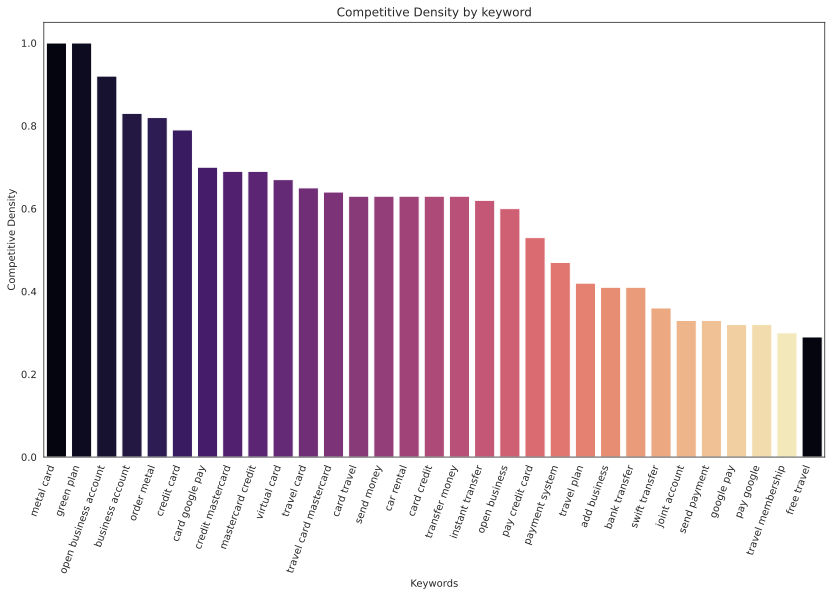

In [ ]:
"""
Plot of Keyword Difficulty and Competitive Density for top 20 keywords
"""

def keyword_plotter(data, col = "Competitive Density", index_start = 0):
  data = data.loc[index_start:index_start+30]

  fig, ax = plt.subplots(figsize = (14,8))

  sns.barplot(x = data["Keywords"],y = data[col], ax = ax,palette = color_palette)
  ax.set_xticklabels(data["Keywords"],horizontalalignment = "right", rotation = 70)
  ax.set_title(f"{col} by keyword")

keyword_plotter(keywords_analysed)

As we can see from these keywords that some of them indeed have quite good search volume and competitive ranking and hence can be used for targeting. 

E.g. 

1. Open Business Acount
2. Instant Transfer
3. Swift Transfer
4. Green Plan
5. Metal Card



The topics and keywords outlined by the topic modelling provide an interesting basis for a deeper Search Analysis. In order to better understand and improve targeting it is important to take a further deep drive into combinations of the important terms outlined in the topics and how to best optimise these. 

##6. Backlink tracking and Content Generation

A stragey for improving a companies SEO score is for google to correctly understand and search for information that the user might need further reading on. This can be done through providing appropriate backlinking to informatory content on different topics of interest. 

Examples for Bunq include SEPA transfers, IBAN and account information for different countries etc. 

This section will aim to understand whether FAQ and Knowledge section contain questions asked by the user based on the topics and keywords identified in the Section just before. In particular we will use these two sections as the testset and precict their topics to identify any underrepresented topics in the Bunq generated texts. 

Furthermore, a description on the next tasks to be carried out are outlined. These include further deepdive into missing content through keyword matching and the generation of missing textual data. 


###6.1 Matching Topic Content to FAQ/Knowledge

The CTM library easily allows for out of sample prediction of the topics through the tp.transform method. This will be utilised for classifying the Bunq provided informatory content accoding to the different issues by users - Where content is missing, content should be created. 


In [ ]:
"""
A list of all the relevant tags - Manually identified
"""
tags = ["Frequently Asked Questions", "Knowledge", "Tips", "Community Travel Tips"]

In [ ]:
"""
Gets all the relevant posts based on the tags list that are posted by Bunq
"""
bunq_posts = all_data.loc[
                          (all_data["tags"].apply(lambda x: all([True for tag in tags if tag in x]))) 
                          & (all_data["username"] == "bunq") 
                          & (all_data["contentType"] == "start_thread")]
bunq_posts.head()

,title,posted_at,created_At,contentType,user_id,username,tags,votes,is_pinned,is_locked,contentHtmlTranslated,text_nohtml,corpus_preprocessed
0,⚡️What’s new in App Update 18.8.0,2021-10-29 19:12:22+00:00,2021-10-29 19:12:22+00:00,start_thread,343358,bunq,"[Updates, What's New?]",6,True,True,<p>Hey bunqers! 🌈</p>\n\n<p>We’ve rolled out a...,Hey bunqers! 🌈\n\nWe’ve rolled out a new updat...,roll new update app include small new improvem...
1,Local Currencies Accounts Fees,2021-10-26 07:32:09+00:00,2021-10-26 07:32:09+00:00,start_thread,343358,bunq,"[Knowledge, What's New?]",1,True,True,"<p>Hey bunqers 🌈</p>\n\n<p>With <span class=""n...","Hey bunqers 🌈\n\nWith bunq, you save on conver...",save conversion spend get real exchange rate e...
2,Local Currencies 💸,2021-10-26 07:30:48+00:00,2021-10-26 07:30:48+00:00,start_thread,343358,bunq,"[Knowledge, What's New?]",0,True,True,"<p>Hey bunqers 🌈</p>\n\n<p>Receive, convert, h...","Hey bunqers 🌈\n\nReceive, convert, hold and sp...",receive convert hold spend favorite currency l...
3,Spanish IBANs Service Coverage 🇪🇸,2021-09-09 08:18:55+00:00,2021-09-09 08:18:55+00:00,start_thread,343358,bunq,"[Updates, Knowledge, Featured, What's New?, Sp...",124,True,True,<p>Hey bunqers! 🌈</p>\n\n<p>As you know with <...,Hey bunqers! 🌈\n\nAs you know with bunq Update...,know update announce exciting launch spanish i...
4,bunq Update 18 FAQ 📚,2021-08-31 16:50:59+00:00,2021-08-31 16:50:59+00:00,start_thread,343358,bunq,"[Updates, Knowledge, Features, What's New?]",0,True,True,"<h2><span class=""notranslate"">bunq</span> Upda...",bunq Update 18 FAQ 📚\n\nHey bunqers! 🌈 \n\nWit...,update faq exciting update come new faq check ...


In [ ]:
test_corpus = tp.transform(list(bunq_posts["text_nohtml"]),list(bunq_posts["corpus_preprocessed"]))

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
#Lets predict the topic for each of the out of bunq info texts
topics = pd.Series([topic_dict.get(i,"NA") for i in np.argmax(ctm.get_doc_topic_distribution(test_corpus,n_samples= 5),axis = 1)])



Sampling: [5/5]: : 5it [00:01,  2.98it/s]


In [ ]:
"""
Lets get all the posts which are classified to one of the relevant topics and the counts per topic
"""
rel_posts = pd.concat([bunq_posts["corpus_preprocessed"].reset_index(drop = True),topics], axis = 1).rename({0 : "Topic"},axis = 1)
topics_test = rel_posts.loc[rel_posts["Topic"] != "NA"].sort_values(by = "Topic")

test_dist = topics_test.groupby("Topic").size()

In [ ]:
"""
Same as for test seta above
"""
topics_train = pd.DataFrame([topic_dict.get(i,"NA") for i in most_probable_topic],columns = ["Topic"])
topics_train = topics_train.loc[topics_train["Topic"] != "NA"].sort_values(by = "Topic")
train_dist = topics_train.groupby(by = "Topic").size()


Text(0.5, 1.0, 'Distribution of Topics')

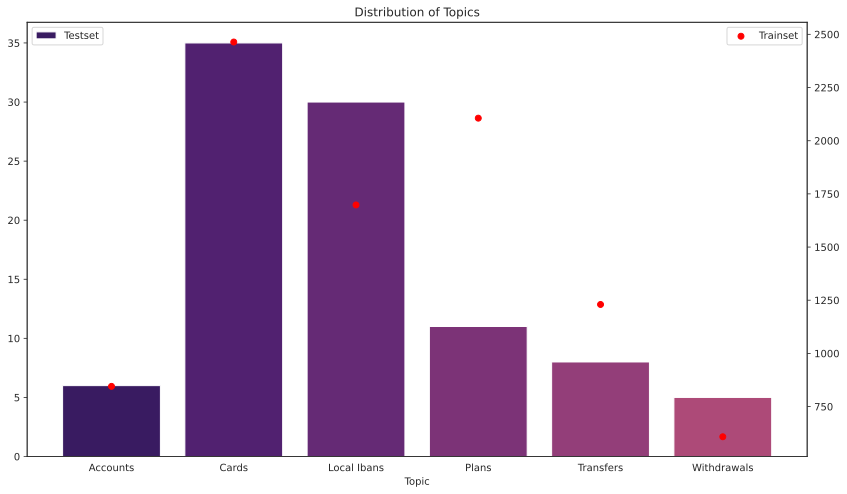

In [ ]:
"""
Lets plot the topic dist of the predictions compared to that of the train set
"""

fig, ax = plt.subplots(figsize = (14,8))
lns1 = sns.barplot(x = test_dist.index,y = test_dist.values, palette = color_palette[5::2],ax = ax,label = "Testset")
ax.legend(loc = "upper left")

ax_twin = ax.twinx()
lns2 = ax_twin.scatter(x = train_dist.index,y = train_dist.values, color = "r", label = "Trainset")
ax_twin.legend(loc = "upper right")


ax.set_title("Distribution of Topics")

It seems that in fact the distribution of topics across the user posts and the Bunq information is quite different. In particular, the Plans and Transfers sections seems underrepresented, which would provide rise to the assumption that there is indeed content that needs to be added. 

For these, it would be important to identify whether the there are any texts which are not identified under the correct topic by the algorithm. Furthermore it is crucial to generate additional texts to further improve the SEO score as well as reduce redundant questions asked by the users on this topic. GPT-3 should be utilised to do so based on optimal keywords found for each topic. 

**Further Considerations**

There is an abundance of ToDo and deep dives that can go further here, however I was reluctant to do so before further optimising the keyword list provided, as they will provide the bases for further understanding here. The tasks to be done include: 

 1. Match most important Keywords and Search Terms in FAQ and Knowledge pages and identify under represented or missing keywords. 
 2. Generate new content based on point 1 utilising GPT-3.
 3. Identify relevant entities across entire website for provision of backlinks to informatory pages.

##7. Meta Description Optimiser

Finally, a quick look at the Bunq together pages reveals that the meta description are equivalent for each post. For proper understanding of the different topics and higher SEO positioning, it is vital that at least all the informatory content, i.e. Knowledge and FAQ receives proper meta descriptions. 

In order to do so, an BART will be utilised to summarise the content of each of the bunq FAQ and Knowledge sections to generate their meta descriptions. These meta descriptions could then be used for deployment. 

BART here is assumed to provide a useful summariser in utilising a combination of both BERT and GPT-2 who each are better in encoding or decoding respectively. 

In [ ]:
%%capture

"""
Some small additional preprocess steps as we dont want the summariser to include certain terms and special characters
"""

import re

"""
All forms of Hey, Hello etc 
"""
pattern = re.compile("(Hey bunqers\S*)|(Hi bunqers\S*)|(Hey)|(Hi)|(Hello)")
corpus_summary = bunq_posts["text_nohtml"].apply(lambda x: re.sub(pattern, "",x))

pattern = re.compile("[^A-z0-9\.\-,\_\s]")
corpus_summary = corpus_summary.apply(lambda x: re.sub(pattern, "",x))

pattern = re.compile("\s+")
corpus_summary = corpus_summary.apply(lambda x: re.sub(pattern, " ",x).strip())

corpus_summary = list(corpus_summary)

In [ ]:
from meta_generator import MetaGenerator
"""
Instantiate meta generator - we will use the default t5-large model here as it worked best
"""
#summarizer = MetaGenerator()

"""
This line will generate the meta descriptions of all the FAQ and Knowledge posts created by Bunq.

This will take quite a while
"""
#descriptions = summarizer.transform(corpus_summary)

'\nThis line will generate the meta descriptions of all the FAQ and Knowledge posts created by Bunq.\n\nThis will take quite a while\n'

In [ ]:
"""
Trim the text to the last sentence stop in the first 157 characters as is limit on meta description
"""

char_length = 157
def trim(text):
  last_stop = max(text[:char_length].rfind(i) for i in ".;:?!")
  return text[:last_stop+1]


#summaries_df = pd.concat([bunq_posts[["title", "tags", "text_nohtml"]].reset_index(drop= True), rel_posts["Topic"], pd.Series(descriptions,name ="Metadescription")], axis = 1)

#summaries_df["Metadescription"] = summaries_df["Metadescription"].apply(trim)

In [ ]:
"""
Safe the descriptions
"""
#summaries_df.to_csv(base_dir + "Data/Results/meta_descriptions.csv")

'\nSafe the descriptions\n'

In [ ]:
"""
Load in the results of the above
"""
summaries_df = pd.read_csv(base_dir + "Data/Results/meta_descriptions.csv")


In [ ]:
"""
Lets check some of the Metadescriptions in order to assess the quality of the generated meta descriptions
One certainly important part to have good descriptions is the FAQ, hence lets select some descriptions from there
"""

faq_desc = summaries_df.loc[summaries_df["tags"].apply(lambda x : "Frequently Asked Questions" in x)]

i = 0
for index, text in faq_desc.iterrows():
  if text["Topic"] != "NA":
    print(f"Title: {text['title']}")
    print(f"Meta Description: {text['Metadescription']}")
    print("-"*50)
    i+= 1
  if i == 20:
    break

Title: Easily rent a car with your bunq credit card 🚗
Meta Description: weve had a few reports of issues with the payment authorization at car rentals when using your bunq card .
--------------------------------------------------
Title: What plans are available?
Meta Description: Currently available plans Easy Money Personal 8.99 euros a month . Become CO2 Free in 2 years, with zero effort.
--------------------------------------------------
Title: Everything about refunds 💸
Meta Description: a refund is a form of purchase protection by mastercard .
--------------------------------------------------
Title: Identity verification explained! 🤳
Meta Description: as a bank, were required to verify your identity before opening your fully fledged bank account at bunq .
--------------------------------------------------
Title: When will I receive my payment?
Meta Description: bank transfers between banks in the SEPA Region usually take 1 or 2 business days to arrive at the recipient .
---------

As can be seen, the meta descriptions quite well describe the topic at hand in a manner that can be quickly understood. The descriptions are quite well done and wouldl probably provide an improvement as they are already. To further optimise the descriptions, the most important keyword for each of the pages should be included in the descriptions. Hence, further research should be carried out to identify such keywords. 

In either case the descriptions as they are could already be implemented to improve the sites score.


The descriptions saved in the CSV file, while not yet perfectly optimised, provide a much more suitable basis for meta descriptions than what is currently utilised   and should hence be considered for deployment in the near future. 